<a href="https://colab.research.google.com/github/mialdrid/Python/blob/master/MSIS579_LAB_Lesson1_XOR_Worksheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network for logical XOR Function

In this lesson you will build a small neural network in Keras and train it to replicate the logical XOR function.

## Imports

In [1]:
%tensorflow_version 1.14
%matplotlib inline
from IPython.display import SVG

import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from keras.models import Model, Sequential
from keras.layers import Input, Dense
from keras.regularizers import l2
from keras.utils.vis_utils import model_to_dot

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.


## Create dataset for the logical XOR function

In [0]:
data_X = np.array([[0, 0],
                   [1, 0],
                   [0, 1],
                   [1, 1]])
data_y = np.array([0, 
                   1, 
                   1, 
                   0])

## Build the neural net model

In [3]:
# TODO
#Build a single layer nueral network
# the input shape is 2 because we have x1 and x2
# the function is sigmoid because the output is binary its 0 or 1
model = Sequential()
model.add(Dense(2, input_shape=(2,), activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


# Question 1: 
How many parameters are there in the model so far? Why? Explain in detail what each parameter represents. Answer in the cell below. 

6 parameters. There are 2 input nodes, connected to 2 hidden nodes. This gives 2x2 = 4 weights. This accounts for 4 of the parameters.

The other 2 parameters are the bias terms: one bias weight for each of the two hidden nodes.

## Add another layer

In [0]:
# TODO
# we dont need to define the input shape again because we are just adding a layer
# units =1 because we are outputing a binary value 0 or 1
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


## Question 2: 
How many new parameters are there now (e.g., how many were added after question 1)? Why? What does each new parameter represent? 

There are 3 new parameters (for a total of 9). The new layer contains a single node, so each of the 2 previous hidden-layer nodes are connected to this single new node. That gives 2 regular weights. In addition, the new single node has a single bias node, connected to it with 1 weight. Hence there are 3 new weights in the network.

## Visualize the model
#Ignore this for now

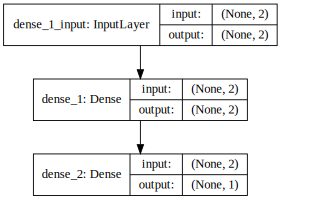

In [14]:
SVG(model_to_dot(model, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

## Train the model

In [0]:
# compile the model using adam as the optmizer and binary_crossentropy as the loss. 
# checkout compile API: https://keras.io/models/sequential/#compile

# TODO
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

### Modify the steps per epoch, number of epochs, etc. below as needed. The goal should be 100% accuracy for the XOR data.

In [17]:
# fit the model using 500 steps per epoch and 10 epochs
# checkout fit API: https://keras.io/models/sequential/#fit

# TODO
#steps_per_epoch defines how many data points we want to look at for each epoch.
# if this is not specificed each epoch will go through the entire dataset
# this allows us to update the model parameters quickly, but looking at a certain set of parameters
model.fit(data_X, data_y, steps_per_epoch=500, epochs=20)

Epoch 1/20
500/500 [==============================] - 1s 1ms/step - loss: 0.0154 - acc: 1.0000
Epoch 2/20
500/500 [==============================] - 1s 1ms/step - loss: 0.0153 - acc: 1.0000
Epoch 3/20
500/500 [==============================] - 1s 1ms/step - loss: 0.0152 - acc: 1.0000
Epoch 4/20
500/500 [==============================] - 1s 1ms/step - loss: 0.0150 - acc: 1.0000
Epoch 5/20
500/500 [==============================] - 1s 1ms/step - loss: 0.0149 - acc: 1.0000
Epoch 6/20
500/500 [==============================] - 1s 1ms/step - loss: 0.0148 - acc: 1.0000
Epoch 7/20
500/500 [==============================] - 1s 1ms/step - loss: 0.0147 - acc: 1.0000
Epoch 8/20
500/500 [==============================] - 1s 1ms/step - loss: 0.0146 - acc: 1.0000
Epoch 9/20
500/500 [==============================] - 1s 1ms/step - loss: 0.0145 - acc: 1.0000
Epoch 10/20
500/500 [==============================] - 1s 1ms/step - loss: 0.0144 - acc: 1.0000
Epoch 11/20
500/500 [============================

### Run the trained model on the dataset.

In [19]:
# make predictions on the data fed into the model.
# checkout predict API: https://keras.io/models/sequential/#predict

# TODO
model.predict(data_X)

array([[0.01059984],
       [0.9880337 ],
       [0.98802817],
       [0.01859375]], dtype=float32)

# Question 3:
Explain the results of the predict() call above. How well did the trained model do on this problem?

The model is close to the desire results given in data_y (see following cell). The results are not exact because we have a sigmoid activation and will never output exactly 1 or 0. But if we consider a threshold of 0.5, setting the output to 1 if above threshold and 0 otherwise, then indeed the output is exactly [0,1,1,0] for the 4 inputs, as expected. Thus the network has solved the XOR problem.

In [11]:
data_y

array([0, 1, 1, 0])

# Question 4:
Print the weights of both layers of the trained network below. HINT: model.layers gives a list of layers. layer.get_weights() returns layer weights.

In [22]:
# print the weights of the first layer 
# TODO
model.layers[0].get_weights()

[array([[-4.9550266, -6.524761 ],
        [-4.95423  , -6.5197697]], dtype=float32),
 array([7.366573 , 2.6723456], dtype=float32)]

In [23]:
# print the weights of the second layer 
# TODO
model.layers[1].get_weights()

[array([[ 10.182215],
        [-10.694892]], dtype=float32), array([-4.7083087], dtype=float32)]